<div style="display: flex; align-items: center;">
    <img src="https://github.com/angeloBuso/ppca-dados-massivos/blob/main/dados/UNB-logo.png?raw=true" alt="UNB logo" width="180" style="margin-right: 10px;">
    <h1>Programa de Pós-graduação em Computação Aplicada – PPCA (UnB)</h1>
</div>

<h2>Análise Estatística de Dados e Informações</h2>

<h5>Professor: João Gabriel de Moraes Souza</h5>
<h5>Aluno: <a href="https://tr.ee/On58b8WbPz" target="_blank">Angelo Donizete Buso Júnior</a></h5>

## **1. Compreensão do Problema de Negócio** *(Business Understanding)*

A satisfação do cliente é um fator crítico para o sucesso e a sustentabilidade de qualquer empresa. Reclamações frequentes de consumidores podem indicar falhas em produtos, serviços ou no atendimento, impactando diretamente a imagem da empresa, a retenção de clientes e, consequentemente, a receita. Identificar e compreender os fatores que levam os consumidores a registrar queixas é fundamental para a construção de estratégias eficazes de melhoria contínua e gestão do relacionamento com o cliente (CRM).

No ambiente altamente competitivo atual, a gestão proativa de reclamações pode diferenciar a empresa no mercado. Ao entender quais fatores influenciam as insatisfações, a empresa pode adotar medidas preventivas, melhorar produtos ou serviços e, assim, aumentar a lealdade do cliente. Uma falha nesse aspecto pode resultar não apenas em perda de clientes, mas também em danos à reputação e custos elevados com novas aquisições de clientes.

Nesse cenário, a utilização de modelos preditivos baseados em Machine Learning (ML) é uma abordagem estratégica para identificar padrões e antecipar comportamentos de insatisfação. A análise de dados históricos permite reconhecer características e comportamentos de clientes que têm maior propensão a registrar queixas. Assim, a empresa pode agir preventivamente para reduzir o número de reclamações e melhorar a experiência do cliente.

A análise proposta nesta tarefa busca entender o perfil dos consumidores insatisfeitos e identificar quais variáveis mais impactam nas reclamações. Com base no dataset [Customer Personality Analysis](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data), que contém informações como idade, renda, perfil familiar, padrão de consumo e resposta a promoções, será possível construir um modelo capaz de prever e explicar o surgimento de queixas.

Essa análise é estratégica, pois permite:

1. Antecipar comportamentos de insatisfação, permitindo ações preventivas.

1. Melhorar a alocação de recursos em áreas críticas, como atendimento ao cliente e qualidade de produtos.

1. Personalizar ofertas e serviços para perfis de clientes mais propensos a reclamar.

1. Reduzir custos operacionais ao minimizar o impacto de reclamações recorrentes.

Por meio da aplicação de técnicas de aprendizado supervisionado, será possível não apenas prever reclamações, mas também identificar as principais variáveis que influenciam esse comportamento. Isso proporciona insights valiosos para a tomada de decisão estratégica, tornando a empresa mais competitiva e eficiente no atendimento às necessidades de seus clientes.

Portanto, este trabalho visa desenvolver uma solução preditiva utilizando Inteligência Artificial para identificar os principais fatores que levam às reclamações de clientes, permitindo que a empresa atue de forma proativa para elevar a satisfação e melhorar sua reputação no mercado.


In [1]:
# Análise de Dados e Visualização**
import pandas as pd               # Manipulação de dados
import numpy as np                # Operações numéricas
import matplotlib.pyplot as plt   # Visualização gráfica
import seaborn as sns             # Visualização gráfica avançada
from scipy import stats           # Estatísticas e testes estatísticos

# Pré-Processamento de Dados**
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Normalização e codificação
from imblearn.under_sampling import RandomUnderSampler          # Balanceamento (undersampling)
from imblearn.over_sampling import SMOTE                        # Balanceamento (oversampling)
from collections import Counter                                 # Contagem de classes
from statsmodels.stats.outliers_influence import variance_inflation_factor  # VIF para multicolinearidade

# Algoritmos de Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Bibliotecas para Treinamento e Validação**
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold  # Divisão de dados e validação cruzada

# Avaliação de Modelos**
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay
)  # Métricas de avaliação
from scikitplot.metrics import plot_confusion_matrix, plot_roc  # Visualização de métricas

# Ignorar Warnings**
import warnings
warnings.filterwarnings("ignore")

# Verificação das Versões das Bibliotecas**
print("Versão do Seaborn:", sns.__version__)
print("Versão do Pandas:", pd.__version__)


Versão do Seaborn: 0.13.2
Versão do Pandas: 2.2.3


### **1.1 Dicionário de Dados**


#### Informações sobre os atributos:

1. `ID`: Identificador único do consumidor.
2. `Year_Birth`: Ano de nascimento do consumidor.
3. `Education`: Nível de educação do consumidor.
4. `Marital_Status`: Estado civil do consumidor.
5. `Income`: Renda anual do consumidor.
6. `Kidhome`: Número de crianças na casa do consumidor.
7. `Teenhome`: Número de adolescentes na casa do consumidor.
8. `Dt_Customer`: Data de inscrição do consumidor.
9. `Recency`: Dias desde a última compra do consumidor.
10. `MntWines`: Gasto em vinhos nos últimos 2 anos.
11. `MntFruits`: Gasto em frutas nos últimos 2 anos.
12. `MntMeatProducts`: Gasto em carnes nos últimos 2 anos.
13. `MntFishProducts`: Gasto em peixes nos últimos 2 anos.
14. `MntSweetProducts`: Gasto em doces nos últimos 2 anos.
15. `MntGoldProds`: Gasto em produtos de ouro nos últimos 2 anos.
16. `NumDealsPurchases`: Número de compras com desconto.
17. `NumWebPurchases`: Número de compras pela web.
18. `NumCatalogPurchases`: Número de compras por catálogo.
19. `NumStorePurchases`: Número de compras em loja física.
20. `NumWebVisitsMonth`: Número de visitas ao site no último mês.
21. `AcceptedCmp1` a `AcceptedCmp5`: Participação em campanhas de marketing 1 a 5.
22. `Response`: 1 se o cliente aceitou a oferta na ultima campanha.
22. `Complain`:  Variável **alvo**, 1 se o consumidor fez uma queixa nos últimos 2 anos, caso contrário 0.
23. `Z_CostContact` e `Z_Revenue`: Variáveis constantes sem relevância.

## **2. Coleta Dados**

Como em todo projeto de machine learning, a qualidade e diversidade dos dados são fundamentais para o sucesso do modelo. Para esta análise, utilizaremos o dataset Customer Personality Analysis, disponível no [Kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data), que contém informações detalhadas sobre o perfil e comportamento de consumidores.

Este conjunto de dados oferece uma visão do cliente, permitindo identificar padrões de comportamento que podem levar ao registro de reclamações. Neste projeto iremos atuar separando os dados em quatro grupos principais:

1. Perfil do Cliente (People)
`ID`, `Year_Birth`, `Education`, `Marital_Status`, `Income`, `Kidhome`, `Teenhome`, `Dt_Customer`, `Recency`, `Complain`.

2. Consumo de Produtos (Products)
`MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`.

3. Resposta a Promoções (Promotion)
`NumDealsPurchases`, `AcceptedCmp1-5`, `Response`.

4. Canais de Compra (Place)
`NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`, `NumWebVisitsMonth`.

Essas informações nos permitirá compreender como o perfil social, o comportamento de compra e a sensibilidade a promoções influenciam a decisão do cliente de registrar uma reclamação. Com essa base de dados, será possível construir modelos preditivos que permitrá capturar padrões nesses dados e auxiliar a empresa na prevenção de reclamações e na melhoria da experiência do cliente.

**Dicas:**  
1. Observar as extensão do arquivo dataSet.
2. Verificar os acessos aos dataSet (LGPD).
3. "Timeframe" dos dados (desde quando tem-se os dados).
4. Valores Missing (será substituido por default ou outro valor - média, por exemplo).
5. Cabeçalho (header=T), caso False, irá indicar cabeçalho.
6. Dados possuem algum comentário.
7. Possui delimitador os dados.

### **2.1 Carga dados**

**Dicas:**  

(i) Observar as extensão do arquivo dataSet;

(ii) Verificar os acessos aos dataSet;

(iii) "Timeframe" dos dados (desde quando tem-se os dados);

(iv) Valores Missing (será substituido por default ou outro valor - média, por exemplo);

(v) Cabeçalho (header=T), caso False, irá indicar cabeçalho;

(vi) Dados possuem algum comentário;

(vii) Possui delimitador os dados;

(viii) Até 3 dimensões PANDAS (1Series, 2DataFrame e 3Panel). Acima 3 dim NUMPY (nparray).

In [2]:
path = "/home/buso/mestrado/aedi-ppca/dados/marketing_campaign.csv"
df = pd.read_csv(path, sep="\t")
print('Os dados possuem {} linhas e {} colunas'.format(df.shape[0], df.shape[1]))
df.head()

Os dados possuem 2240 linhas e 29 colunas


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## **3. Análise Exploratória**


### 3.1 Visão Geral dataSet
Nesta estapa estamos interessados em entender melhor a pergunta ***"Quais tipos de dados tem no nosso dataSet?"***
* Tipo Objeto que estamos trabalhando
* Tipos Dados
* Shape - Dimensionalidade
* Índices
* Descrição dos dados

In [3]:
def visaogeral(df, mensagem):
    print(f'{mensagem}:\n')
    print("Qtd Observações:", df.shape[0])
    print("\nQtd Atributos:", df.shape[1])
    print("\nAtributos:")
    print(df.columns.values)
    # print(df.columns.tolist())
    print("\nQtd Valores missing:", df.isnull().sum().values.sum())
    print("\nValores Unicos:")
    print(df.nunique())

In [4]:
visaogeral(df,'Visão Geral do dataSet')

Visão Geral do dataSet:

Qtd Observações: 2240

Qtd Atributos: 29

Atributos:
['ID' 'Year_Birth' 'Education' 'Marital_Status' 'Income' 'Kidhome'
 'Teenhome' 'Dt_Customer' 'Recency' 'MntWines' 'MntFruits'
 'MntMeatProducts' 'MntFishProducts' 'MntSweetProducts' 'MntGoldProds'
 'NumDealsPurchases' 'NumWebPurchases' 'NumCatalogPurchases'
 'NumStorePurchases' 'NumWebVisitsMonth' 'AcceptedCmp3' 'AcceptedCmp4'
 'AcceptedCmp5' 'AcceptedCmp1' 'AcceptedCmp2' 'Complain' 'Z_CostContact'
 'Z_Revenue' 'Response']

Qtd Valores missing: 24

Valores Unicos:
ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWe

O conjunto de dados possui quase **2,3 mil observações** e **29 atributos**, com 24 possíveis valores ausentes (*missing*). Os atributos incluem dados pessoais, históricos de consumo e resultados de campanhas promocionais. Abaixo, destacamos os atributos qualitativos e quantitativos:

- **Atributos qualitativos**: Podem representar categorias, entrega alguma qualidade a informação:
  - `Education` (5 valores únicos): Grau de instrução do cliente.
  - `Marital_Status` (8 valores únicos): Estado cívil.
  - `Complain` (2 valores únicos): **Variável Target** , se houve ou não reclamação.
  - `AcceptedCmp1` (2 valores únicos): Indica se houve aceite ou não da promoção 1.
  - `AcceptedCmp2` (2 valores únicos): Indica se houve aceite ou não da promoção 2.
  - `AcceptedCmp3` (2 valores únicos): Indica se houve aceite ou não da promoção 3.
  - `AcceptedCmp4` (2 valores únicos): Indica se houve aceite ou não da promoção 4.
  - `AcceptedCmp5` (2 valores únicos): Indica se houve aceite ou não da promoção 5.
  - `Response` (2 valores únicos): Indica se houve aceite ou não da última campanha.

- **Atributos quantitativos**: Incluem variáveis numéricas contínuas, como `Income`, `MntWines`, `MntFruits`, `MntMeatProducts`, 
`MntFishProducts`, `MntSweetProducts`, `MntGoldProds`. Os demais atributos, *a priori* demonstra ser *features* numéricas discretas, sendo que após o processo de exploração dos dados (EDA) seja interessante realizar algumas trasformaões em categórias nelas.

Nosso objetivo é realmente entender se esses formatos representam a **informação** que a *feature* precisa passar!

Essa combinação de atributos qualitativos e quantitativos é fundamental para capturar os diferentes fatores que influenciam o registro de reclação de clientes. Em modelo de ML esses atributos, seja ele qualitativos ou quantitativos, salvo a nossa variável alvo, serão analisados como variáveis independentes no modelo preditivo, ou seja, ajuda a explicar a variável alvo!


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

A partir da análise exploratória realizada, já é possível ter uma **compreensão situacional** sobre o conjunto de dados. O dataset contém **2.240 registros** de clientes, com informações que indicam se eles fizeram ou não uma reclamação.

A coluna **`ID`**, devido à sua nomenclatura e à alta quantidade de valores únicos, funciona como um **identificador exclusivo de cada cliente** e não possui valor preditivo. Por isso, será excluída do modelo.

A análise de valores únicos revelou a presença de variáveis **categóricas**, o que indica a necessidade de aplicar técnicas de **codificação de variáveis**, como a criação de **variáveis dummies** (*One-Hot Encoding*, ou outra técnica), para que possam ser utilizadas pelo modelo de machine learning.

O dataset **apresentou valores ausentes** nesta fase inicial, sendo o atributo `Income` com 24 dados ausentes (2240 - 2216). Importante ressaltar que, durante o processo de **engenharia de atributos** (*feature engineering*) e **transformação de variáveis**, poderá surgir mais valores nulos em decorrência de operações como discretização, normalização ou criação de novas variáveis, a depender da necessidade.

Portanto, iremos tratar esses valores nulos já encontrados e ainda **monitorar e tratar** possíveis valores ausentes que possa surgir, para garantir a **qualidade e integridade dos dados**, assegurando um bom desempenho do modelo preditivo.


**TRADE-OFF's da Ciência de Dados!**

Se o número de **linhas/observações** no seu arquivo for **muito grande**, o algoritmo pode levar **muito tempo** para ser **treinado**. Se o número de **registros for muito pequeno**, você pode não ter registros suficientes para treinar seu modelo (**underfitting**- decora ponto dos dados).

Se você tiver **muitas colunas/atributos** em seu arquivo, o algoritmo pode apresentar problemas de performance devido a **alta dimensionalidade**.

A melhor solução vai depender de cada caso. Mas lembre-se: **treine** seu modelo em um subset do seu conjunto de dados maior **(70% treino)** e depois aplique o modelo a novos dados **(30% teste)** para verificar a performance. Uma boa prática é ter uma massa de dados para **validação durante o treinamento**.


Se o número de linhas/observações no seu conjunto de dados for muito grande, o treinamento do modelo pode ser demorado, especialmente para algoritmos mais complexos. Nesse caso, técnicas como amostragem representativa, processamento distribuído (ambientes paralelizados) ou redução de dimensionalidade podem ajudar. Por outro lado, se o número de registros for muito pequeno, o modelo pode não capturar padrões gerais, levando a underfitting (quando o modelo "simplesmente decora" os pontos do conjunto de dados sem aprender generalizações úteis).

Além disso, ter muitas colunas/atributos pode causar problemas de alta dimensionalidade, dificultando o aprendizado do modelo e aumentando o risco de overfitting (quando o modelo se ajusta demais aos dados de treino, perdendo capacidade de generalizar). Métodos como seleção de características ou redução de dimensionalidade (ex.: PCA) são úteis para mitigar esses problemas.

A prática recomendada é dividir o conjunto de dados em treino (70%) e teste (30%), para avaliar o modelo em dados novos. Além disso, durante o treinamento, é importante usar uma massa de dados para validação (ex.: validação cruzada), garantindo que o modelo não dependa apenas de uma única divisão de dados e tenha boa capacidade de generalização.

Em resumo, a melhor solução varia conforme o problema, mas a análise cuidadosa do tamanho e da complexidade dos dados é essencial para treinar um modelo eficiente e confiável.

Observando uma amostra inicial e uma amostra final do dataSet.

In [6]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [7]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


Relembrando o shape dos dados:

In [8]:
print('Os dados possuem {:.2f} linhas e {} colunas'.format(df.shape[0], df.shape[1]))

Os dados possuem 2240.00 linhas e 29 colunas


In [9]:
# checando índice (endereço de cada obs) e sua distribuição
df.index

RangeIndex(start=0, stop=2240, step=1)

In [10]:
# checando os nomes das colunas
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

#### **3.1.1 Variável Alvo**

A **variável alvo** deste estudo é o atributo **`Complain`**, que indica se o cliente realizou ou não uma reclamação na empresa. Essa variável é categórica binária e representa o resultado que o modelo de machine learning deve prever. Seus valores são definidos da seguinte forma:

- **0** → O cliente **não realizou uma reclamação** na empresa.  
- **1** → O cliente **realizou uma reclamação** na empresa.

#####  3.1.1.1  Amplitude

In [11]:
df['Complain'].describe()

count    2240.000000
mean        0.009375
std         0.096391
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Complain, dtype: float64

In [12]:
df['Complain'].unique()

array([0, 1])

Observando os valores únicos da variável **`Complain`**, confirmamos que se trata de uma **variável categórica binária**, com duas categorias distintas:

- **0** → O cliente **não realizou uma reclamação** na empresa.  
- **1** → O cliente **realizou uma reclamação** na empresa.

Dessa forma, estamos diante de um problema de **aprendizado supervisionado** do tipo **classificação**, no qual o objetivo é prever a probabilidade de um cliente realizar uma reclamação ou não na ouvidoria da empresa.

Para essa tarefa, utilizaremos um **modelo classificador**, que será treinado para identificar padrões de comportamento associados a uma possível reclamação e antecipar essa insatisfação do cliente, revertendo uma possível má experiência desse cliente.

##### **3.1.1.2 Balanceamento dos Dados**

Em problemas de **classificação**, é frequente encontrar conjuntos de dados com **classes desbalanceadas**, onde uma das classes apresenta um número de registros significativamente maior do que a outra. Esse desequilíbrio pode comprometer o desempenho do modelo, tornando-o **tendencioso** para a classe majoritária e dificultando a correta identificação da classe minoritária.

O **balanceamento das classes** é um dos **pressupostos fundamentais** a serem considerados na construção de modelos classificadores com uso de algoritmos de machine learning. Caso não seja tratado adequadamente, o modelo pode apresentar baixa capacidade de prever eventos menos frequentes. Por isso, é essencial adotar estratégias para equilibrar as classes durante o pré-processamento, garantindo previsões mais precisas e confiáveis.

In [13]:
print(df['Complain'].value_counts())
print("\nObserva-se que {:.4f}% do dataSet fizeram reclamações.".format((df.groupby('Complain').size()[1] / df.shape[0])*100))
print("Enquanto que {:.4f}% dos dados não realizaram nenhuma reclamação.".format((df.groupby('Complain').size()[0] / df.shape[0])*100))

Complain
0    2219
1      21
Name: count, dtype: int64

Observa-se que 0.9375% do dataSet fizeram reclamações.
Enquanto que 99.0625% dos dados não realizaram nenhuma reclamação.


No contexto deste estudo, a variável **`Complain`** apresenta desbalanceamento, com a maioria dos clientes não realizando reclamação (**classe 0**) e apenas quase 1% que realizou reclamação (**classe 1**). Esse cenário pode levar o modelo a prever majoritariamente vlientes que não reclamam, negligenciando a insatisfação de uma minoria.

Para mitigar esse problema, existem técnicas de **balanceamento de classes**, como por exemplo:

- **Oversampling (Superamostragem)**: Aumentar a quantidade de registros da classe minoritária por meio da duplicação de dados ou geração de novas amostras sintéticas, como a técnica **SMOTE** (*Synthetic Minority Over-sampling Technique*).  
- **Undersampling (Subamostragem)**: Reduzir a quantidade de registros da classe majoritária, eliminando amostras redundantes para equilibrar a proporção entre as classes.  

A escolha adequada da técnica de balanceamento é fundamental para garantir que o modelo preditivo tenha uma **boa performance** e consiga identificar com precisão os clientes que possuem maior probabilidade de evasão.

#####  3.1.1.3  Plots Variável Alvo

In [14]:
%matplotlib inline
# seto algumas caracteristicas para os plots. Padornizar Plots
sns.set_theme(style='darkgrid')
sns.set_palette("hls", 3)

In [15]:
balData = pd.DataFrame(df.Complain.value_counts())
balData['% total'] = round(100*balData['count']/df.shape[0], 2)

          count  % total
Complain                
0          2219    99.06
1            21     0.94


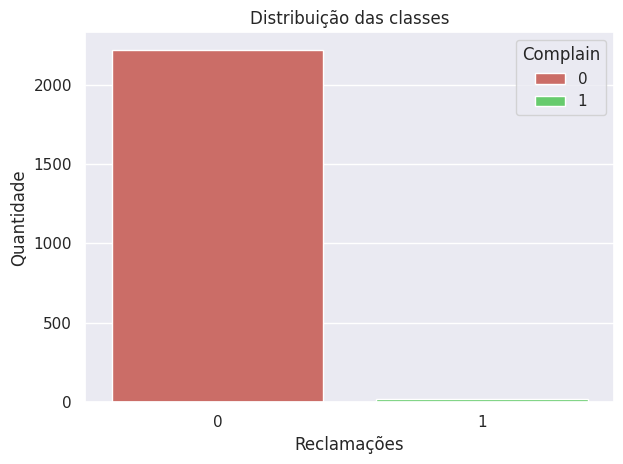

In [16]:
print(balData)
y_plot = sns.countplot(data=df, x='Complain', order=df.Complain.value_counts().index, hue= 'Complain')

plt.title('Distribuição das classes')
plt.ylabel('Quantidade')
plt.xlabel('Reclamações')

plt.tight_layout()
plt.show()

#### **3.1.2 Grupo Cliente**
Para compreender melhor o perfil dos consumidores que registram reclamações, será realizada uma análise detalhada das características comportamentais dos clientes. A análise envolverá as seguintes variáveis: `Year_Birth`, `Education`, `Marital_Status`, `Income`, `Kidhome`, `Teenhome`, `Dt_Customer`, `Recency` e `Complain`.

Essas variáveis permitirá identificar padrões de comportamento e possíveis perfis mais propensos a registrar queixas. Aspectos como a idade, nível de educação, estado civil e estrutura familiar podem influenciar na percepção de qualidade de serviço e satisfação do cliente. Da mesma forma, a renda e o tempo de relacionamento com a empresa são fatores que podem impactar no grau de exigência e na frequência de reclamações.

Ao analisar esses atributos, será possível identificar segmentos de clientes que demandam maior atenção e desenvolver estratégias personalizadas para melhorar a experiência do consumidor e reduzir o número de queixas.

In [17]:
df_graph_customer = df[['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer','Recency','Complain']]
df_graph_customer.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,0
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,0


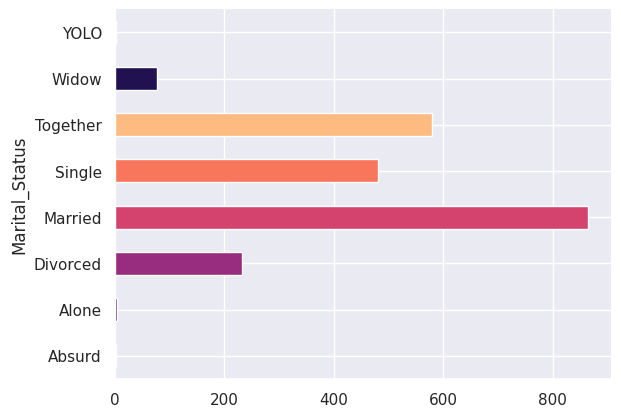

In [18]:
df_graph_customer.groupby('Marital_Status').size().plot(kind='barh', color=sns.palettes.mpl_palette('magma'))
plt.gca().spines[['top', 'right',]].set_visible(False)

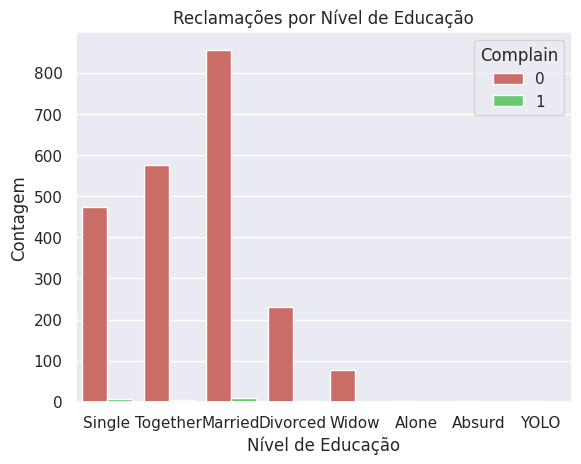

In [19]:
sns.countplot(x='Marital_Status', hue='Complain', data=df)
plt.title('Reclamações por Nível de Educação')
plt.xlabel('Nível de Educação')
plt.ylabel('Contagem')
plt.show()

In [20]:
df['Marital_Status'].groupby(df['Complain']).value_counts()

Complain  Marital_Status
0         Married           856
          Together          575
          Single            474
          Divorced          230
          Widow              77
          Alone               3
          Absurd              2
          YOLO                2
1         Married             8
          Single              6
          Together            5
          Divorced            2
Name: count, dtype: int64

A análise da variável `Marital_Status` revelou que a maioria dos clientes está casada ou vive junto, seguida por clientes solteiros.

A proporção por estado cívil de quem fez reclamação é tão pequena que quase não identificamos no gráfico. No entanto, olhado para quem faz reclamaçoes o primeiro lugar ainda continua para os clientes casados, mas o segundo passa a ser dos clientes solteiros.

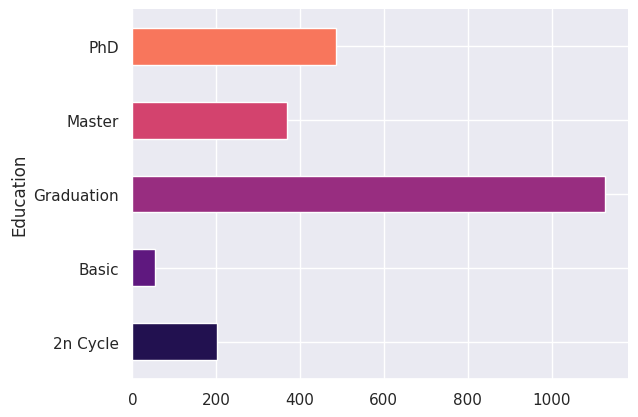

In [21]:
df_graph_customer.groupby('Education').size().plot(kind='barh', color=sns.palettes.mpl_palette('magma'))
plt.gca().spines[['top', 'right',]].set_visible(False)

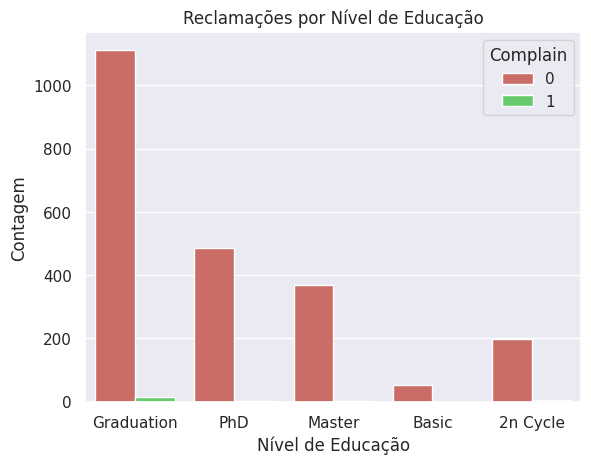

In [22]:
sns.countplot(x='Education', hue='Complain', data=df)
plt.title('Reclamações por Nível de Educação')
plt.xlabel('Nível de Educação')
plt.ylabel('Contagem')
plt.show()

In [23]:
df['Education'].groupby(df['Complain']).value_counts()

Complain  Education 
0         Graduation    1113
          PhD            485
          Master         368
          2n Cycle       199
          Basic           54
1         Graduation      14
          2n Cycle         4
          Master           2
          PhD              1
Name: count, dtype: int64

A variável `Education` nos mostra que a maioria dos clientes com reclamações possui Graduação (Graduation), o que é esperado devido à predominância desse grupo na base de dados. No entanto, quando analisamos proporcionalmente a relação entre o número de clientes e o número de reclamações, surgem insights importantes:

Graduation: 14 reclamações em 1.113 clientes → 1,26%

PhD: 1 reclamação em 485 clientes → 0,21%

Master: 2 reclamações em 368 clientes → 0,54%

2n Cycle: 4 reclamações em 199 clientes → 2,01%

Basic: 0 reclamações em 54 clientes → 0%

Esses dados mostram que, proporcionalmente, os clientes com nível de educação 2n Cycle apresentam uma maior tendência a registrar reclamações quando comparados aos outros grupos. Apesar do número absoluto de reclamações ser maior entre clientes com Graduação, o índice de insatisfação relativo é mais elevado no grupo 2n Cycle.

Essa diferença sugere que clientes com nível de escolaridade intermediário podem ter expectativas diferentes ou percepções distintas em relação aos produtos e serviços oferecidos. Esse padrão reforça a necessidade de ações específicas para melhorar a experiência desses clientes, ajustando estratégias de comunicação e suporte conforme o perfil educacional.

In [24]:
df['Year_Birth'].describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

A variável `Year_Birth` apresenta o ano de nascimento dos clientes na base de dados. A pessoa com mais idade nasceu em 1893, já a mais nova nasceu no ano de 1996. 

Usaremos a variável `Year_Birth` para encontrar a **idade**. Trabalhar diretamente com o ano de nascimento pode dificultar a interpretação dos dados, enquanto a idade fornece uma medida direta e intuitiva para compreender o comportamento do cliente. A conversão será realizada subtraindo o valor de `Year_Birth` pelo ano atual (premissa assumida), permitindo identificar com clareza como diferentes faixas etárias influenciam na propensão a registrar reclamações.

Esta etapa de criar variáveis é comumente conehcida como *Feature Engineering*. Usualmente fazemos esse passo logo após o processo de EDA dos dados. No entanto, dado a dinâmica de projetos de ciências de dados, iremos realizar agora para facilitar o entendimento dos relacionamentos entre os atributos.

In [25]:
df['Age']= 2025 - df['Year_Birth']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,68
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,71
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,60
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,41
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,44


In [26]:
df['Age'].describe()

count    2240.000000
mean       56.194196
std        11.984069
min        29.000000
25%        48.000000
50%        55.000000
75%        66.000000
max       132.000000
Name: Age, dtype: float64

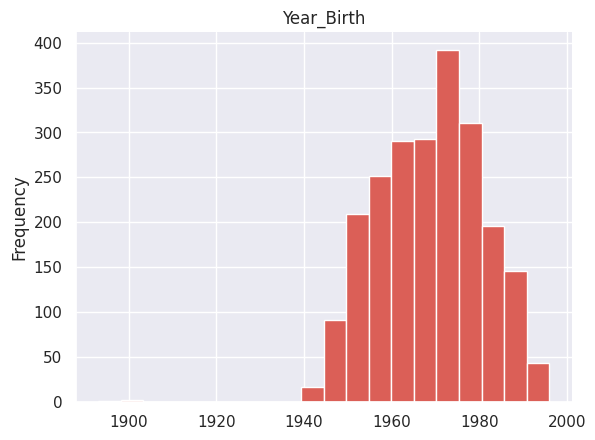

In [27]:
df['Year_Birth'].plot(kind='hist', bins=20, title='Year_Birth')
plt.gca().spines[['top', 'right',]].set_visible(False)

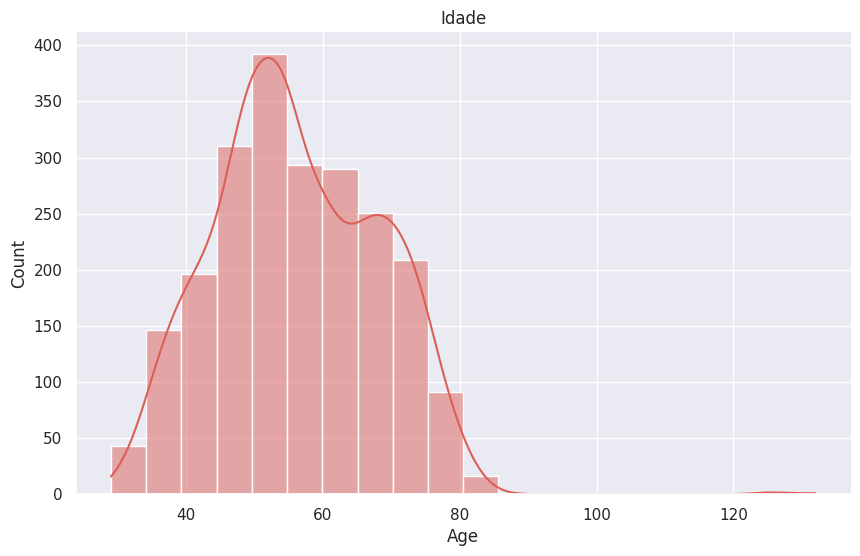

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Idade')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

A maior parte dos clientes está concentrada entre 40 e 70 anos, com um pico próximo aos 50 anos. Isso indica que a base de clientes tem um perfil majoritariamente de meia-idade. Há uma diminuição significativa no número de clientes acima dos 70 anos, e pouquíssimos clientes ultrapassam os 80 anos.

Observa-se uma cauda longa na direita, com idades acima de 100 anos. Esses valores devem ser investigados e possivelmente tratados no pré-processamento.

Há um número reduzido de clientes abaixo dos 40 anos indicando que o produto/serviço da empresa não é direcionado para o público mais jovem.

A variável `Dt_Customer` representa a data de início do relacionamento do cliente com a empresa. Atualmente, essa variável não está no formato adequado, sendo necessário convertê-la para um formato de data. Após essa transformação, será criada uma nova variável que representará o tempo de relacionamento em anos, possibilitando uma análise mais clara e intuitiva sobre a influência desse fator no comportamento do cliente.

In [29]:
df['Dt_Customer'].describe()

count           2240
unique           663
top       31-08-2012
freq              12
Name: Dt_Customer, dtype: object

In [30]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

In [31]:
df['Dt_Customer']

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

Validando a não criação de dados faltantes na mudança do tipo de dados.

In [32]:
df['Dt_Customer'].isnull().sum()    

0

Premissa usada para criação da nova variável -> data corrente

In [33]:
current_date = pd.to_datetime(datetime.now().date())
df['Years_Since_Customer'] = round((current_date - df['Dt_Customer']).dt.days / 365, 0)

In [34]:
df.Years_Since_Customer.describe()

count    2240.000000
mean       11.519196
std         0.499743
min        11.000000
25%        11.000000
50%        12.000000
75%        12.000000
max        12.000000
Name: Years_Since_Customer, dtype: float64

In [35]:
df['Years_Since_Customer'].groupby(df['Complain']).describe()

,count,mean,std,min,25%,50%,75%,max
Complain,,,,,,,,
0,2219.0,11.518702,0.499763,11.0,11.0,12.0,12.0,12.0
1,21.0,11.571429,0.507093,11.0,11.0,12.0,12.0,12.0


Nessa base de dados, podemos verificar que os clientes começaram a se relacionar com a empresa no ano de 2012, estendendo até 2014. Com média de 11 anos de relacionamento.

Da variável `Age` que tratamos acima, notamos idade superior a 80 anos. Se retrocedermos 80 anos do ano de 2012, obtemos o ano de 1932. Iremos verificar os registros que atendem a condição do ano de aniversário ser inferior ao ano de 1932

In [36]:
df['Complain'].loc[df['Year_Birth'] < 1932].value_counts()

Complain
0    2
1    1
Name: count, dtype: int64

Identificamos 3 registros que sugerem ser outliers para a variável `Age`, sendo possível sua identificação, após a exploração da variável `Dt_Customer`.
Embora um desses registros pertença à classe "1", optamos por excluí-los para treinar o modelo sem possíveis inconsistências que possam ter ocorrido na importação dos dados. Essa decisão visa melhorar a qualidade dos dados e garantir que o modelo não seja influenciado por valores potencialmente incorretos.

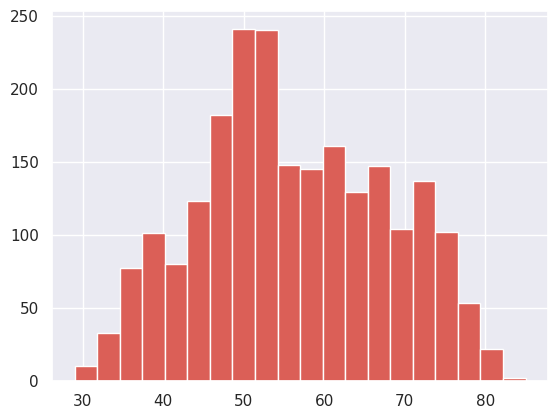

In [37]:
df['Age'].loc[df['Year_Birth'] >= 1932].hist(bins=20);

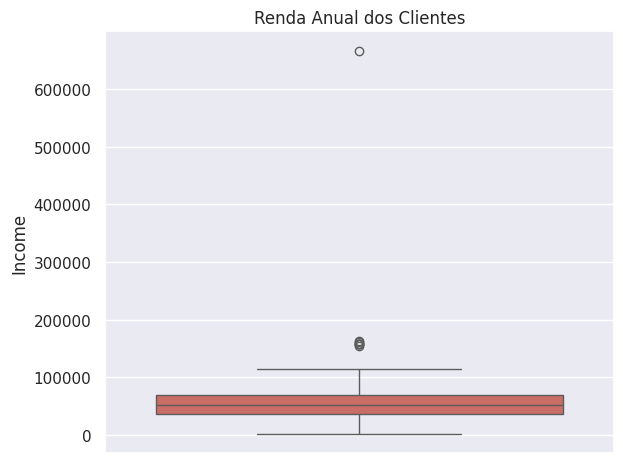

In [38]:
sns.boxplot(y='Income', data=df)
plt.title('Renda Anual dos Clientes')

plt.tight_layout()
plt.show()

In [39]:
df['Income'].describe() 

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [40]:
df['Complain'].loc[df['Income'] == 666666]

2233    0
Name: Complain, dtype: int64

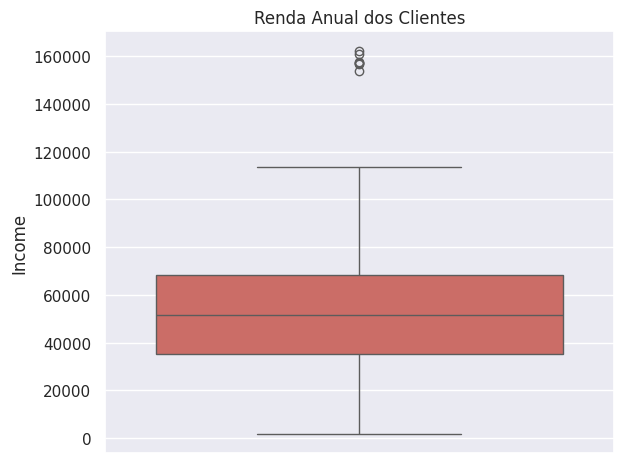

In [41]:
sns.boxplot(y='Income', data=df[df['Income'] < 666666])
plt.title('Renda Anual dos Clientes')

plt.tight_layout()
plt.show()

In [42]:
df['Income'][df['Income'] < 666666].describe()

count      2215.000000
mean      51969.861400
std       21526.320095
min        1730.000000
25%       35284.000000
50%       51373.000000
75%       68487.000000
max      162397.000000
Name: Income, dtype: float64

A maioria dos clientes possui uma renda concentrada em torno da mediana (51.373), com uma faixa interquartil razoavelmente ampla. No entanto, os outliers de renda elevada podem indicar clientes de alto poder aquisitivo, que podem ser tratados de forma diferenciada em análises ou estratégias de marketing

Notamos ainda um possível valor que pode ter sido erro de digitação. Como a classe que ele representa é "0" iremos exluir esse registro para treinar o modelo.

In [43]:
df[['Kidhome','Teenhome']].describe()

,Kidhome,Teenhome
count,2240.000000,2240.000000
mean,0.444196,0.506250
std,0.538398,0.544538
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,2.000000,2.000000


As variáveis `Kidhome` e `Teenhome` indicam o número de filhos pequenos e adolescentes, respectivamente. Individualmente, essas variáveis podem não oferecer informações completas sobre o perfil familiar do cliente, pois um cliente pode ter registros em ambas as colunas. Para facilitar a análise, será criada uma nova variável que representa a quantidade total de filhos de cada cliente. No entanto, as colunas separadas podem ser úteis para estratégias direcionadas à faixa etária dos filhos, permitindo, por exemplo, segmentações específicas baseadas em necessidades diferentes para crianças e adolescentes.

In [44]:
df['Total_filhos'] = df['Kidhome'] + df['Teenhome']
df[['Kidhome','Teenhome','Total_filhos']].head()

,Kidhome,Teenhome,Total_filhos
0,0,0,0
1,1,1,2
2,0,0,0
3,1,0,1
4,1,0,1


In [45]:
df[['Kidhome','Teenhome','Total_filhos']].describe()

,Kidhome,Teenhome,Total_filhos
count,2240.000000,2240.000000,2240.000000
mean,0.444196,0.506250,0.950446
std,0.538398,0.544538,0.751803
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000
max,2.000000,2.000000,3.000000


Esses dados sugerem que a maioria dos clientes possui uma estrutura familiar enxuta, com poucos filhos. Estratégias específicas para famílias podem ser direcionadas para um público relativamente menor, considerando que poucos clientes possuem mais de um filho.

#### **3.1.3 Grupo Produto**

Para compreender como os padrões de consumo estão relacionados às reclamações, será realizada uma análise detalhada do grupo de produtos. Esse grupo inclui variáveis que indicam os gastos dos clientes em diferentes categorias de produtos, sendo elas: `MntWines` (vinhos), `MntFruits` (frutas), `MntMeatProducts` (carnes), `MntFishProducts` (peixes), `MntSweetProducts` (doces) e `MntGoldProds` (produtos de ouro). Além disso, a variável-alvo `Complain` será considerada para explorar como esses gastos podem influenciar no registro de reclamações.

Essas variáveis fornecem informações sobre os hábitos de consumo dos clientes, permitindo identificar padrões e correlações entre os tipos de produtos adquiridos e a satisfação geral com os serviços da empresa. A análise desse grupo ajudará a responder questões como:

Quais os gastos médios dos clientes nesses itens?

Existe uma relação entre o volume de compras de determinados produtos e a propensão a reclamar?

Que itens as pessoas mais gastam?

Com base nessas questões, a análise será conduzida para compreender o impacto do consumo de produtos na experiência do cliente e na geração de reclamações.

In [46]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Years_Since_Customer,Total_filhos
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,68,12.0,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,71,11.0,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,60,11.0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,41,11.0,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,44,11.0,1


In [47]:
produtos = ['MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']

In [48]:
df[produtos].describe()

,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,26.302232,166.950000,37.525446,27.062946,44.021875
std,39.773434,225.715373,54.628979,41.280498,52.167439
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,16.000000,3.000000,1.000000,9.000000
50%,8.000000,67.000000,12.000000,8.000000,24.000000
75%,33.000000,232.000000,50.000000,33.000000,56.000000
max,199.000000,1725.000000,259.000000,263.000000,362.000000


In [49]:
df.groupby('Complain')[['MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].mean().rename(index={0: 'nao_reclamou', 1: 'reclamou'})

,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Complain,,,,,
nao_reclamou,26.322217,167.465525,37.636773,27.153222,44.178459
reclamou,24.190476,112.476190,25.761905,17.523810,27.476190


A análise dos dados revelou que clientes que registraram reclamações tendem a gastar, em média, menos em todas as categorias de produtos avaliadas, em comparação com clientes que não reclamaram. Por exemplo, enquanto clientes que não reclamaram gastaram, em média, 167,47 em produtos de carne (`MntMeatProducts`), os clientes que reclamaram gastaram 112,47 na mesma categoria. O mesmo padrão é observado em outras categorias como frutas (26,32 contra 24,19) e doces (27,15 contra 17,52).

Essa diferença nos padrões de consumo pode indicar que clientes que gastam menos têm percepções diferentes sobre o valor dos produtos ou maior sensibilidade a problemas relacionados ao custo-benefício. Esses insights podem ser usados para ajustar estratégias de comunicação, atendimento e promoções, visando melhorar a experiência de consumidores mais propensos a reclamar.

In [50]:
for produto in produtos:
    gastou = (df[produto] > 0).sum()
    nao_gastou = (df[produto] == 0).sum()
    total = len(df)
    print(f"\n{produto}:")
    print(f"Clientes que gastaram (>0): {gastou} ({(gastou / total) * 100:.2f}%)")
    print(f"Clientes que não gastaram (0): {nao_gastou} ({(nao_gastou / total) * 100:.2f}%)")


MntFruits:
Clientes que gastaram (>0): 1840 (82.14%)
Clientes que não gastaram (0): 400 (17.86%)

MntMeatProducts:
Clientes que gastaram (>0): 2239 (99.96%)
Clientes que não gastaram (0): 1 (0.04%)

MntFishProducts:
Clientes que gastaram (>0): 1856 (82.86%)
Clientes que não gastaram (0): 384 (17.14%)

MntSweetProducts:
Clientes que gastaram (>0): 1821 (81.29%)
Clientes que não gastaram (0): 419 (18.71%)

MntGoldProds:
Clientes que gastaram (>0): 2179 (97.28%)
Clientes que não gastaram (0): 61 (2.72%)


A análise revelou que quase todos os clientes gastam em produtos de carne (99,96%), o que torna essa categoria a mais representativa em termos de consumo. Em seguida, estão os produtos de ouro (97,28%), que também apresentam uma alta proporção de clientes com gastos. As categorias de peixes (82,86%), frutas (82,14%) e doces (81,29%) possuem um percentual semelhante de clientes que gastaram. Essas informações indicam que as carnes são a principal prioridade de consumo dos clientes, seguidas por produtos de ouro e outras categorias alimentícias. Estratégias de marketing podem se beneficiar ao focar nesses itens mais populares para maximizar a satisfação e o engajamento dos clientes.

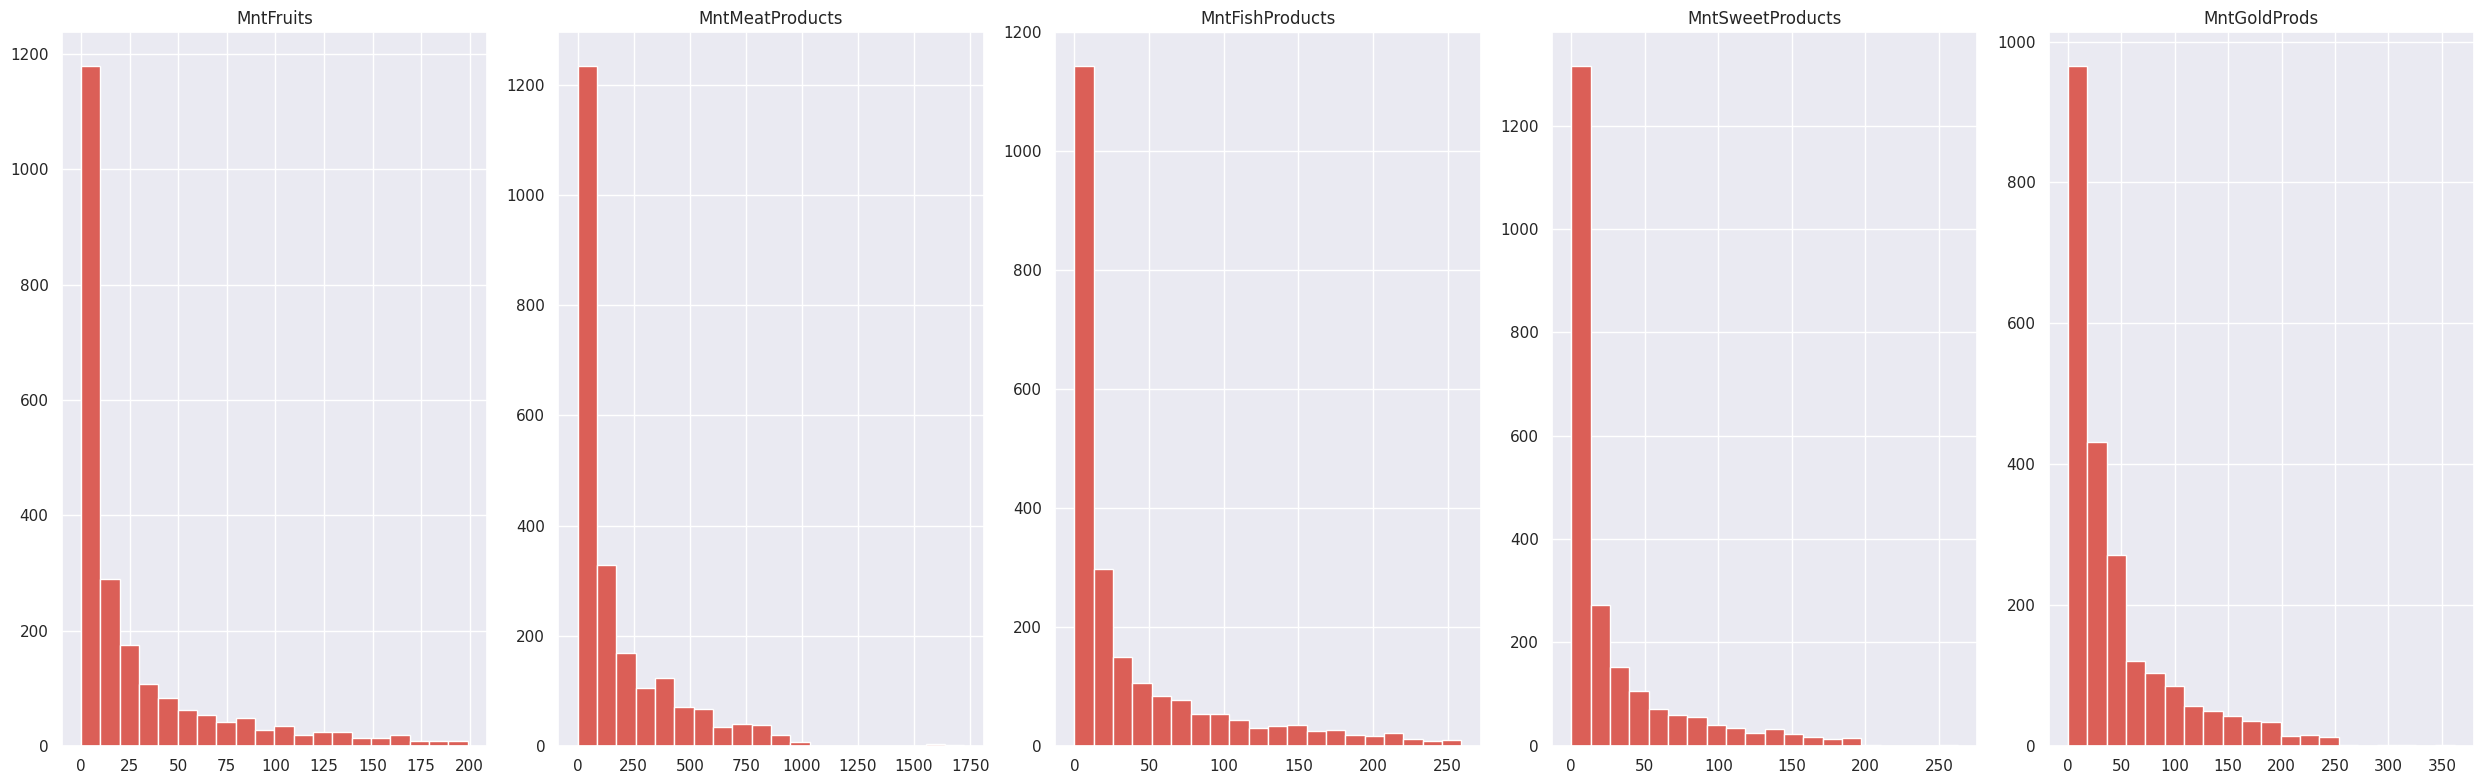

In [51]:
fig, ax =  plt.subplots(1, 5, figsize=(25,8))
df[['MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].hist(bins=20, ax=ax)
plt.tight_layout()

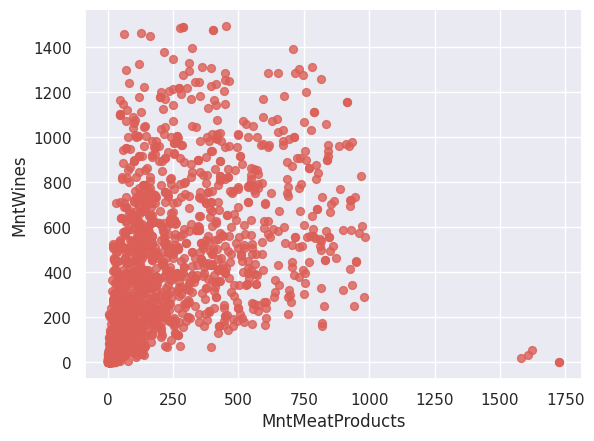

In [52]:
df.plot(kind='scatter', x='MntMeatProducts', y='MntWines', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

A análise da relação entre os gastos com vinhos (`MntWines`) e carnes (`MntMeatProducts`) mostrou uma correlação positiva fraca a moderada. Isso indica que clientes que gastam mais em carne tendem a gastar também em vinho, embora essa relação não seja linear e apresente grande variação. 

Essa relação pode sugerir que carne e vinho são produtos consumidos de forma complementar por alguns clientes, especialmente aqueles com gastos moderados. Estratégias de marketing, como promoções combinadas entre essas categorias, podem ajudar a maximizar as vendas e melhorar a experiência do cliente

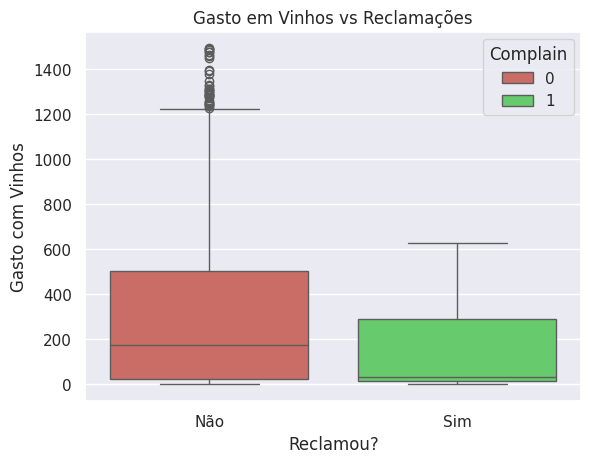

In [53]:
sns.boxplot(x='Complain', y='MntWines', data=df, hue='Complain')
plt.title('Gasto em Vinhos vs Reclamações')
plt.xlabel('Reclamou?')
plt.ylabel('Gasto com Vinhos')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

Os clientes que não reclamaram têm um padrão de consumo mais elevado em vinhos, tanto na mediana quanto nos valores máximos.

Clientes que reclamaram gastam menos em vinhos, o que pode indicar menor interesse por essa categoria ou uma insatisfação relacionada ao custo-benefício percebido.

#### **3.1.4 Grupo Promoção**

O grupo de promoções compreende variáveis que indicam a sensibilidade dos clientes a ofertas e campanhas promocionais. Esse grupo inclui as seguintes variáveis:

`NumDealsPurchases`: Número de compras realizadas com desconto.

`AcceptedCmp1` - `AcceptedCmp5`: Indicam se o cliente aceitou as ofertas de cinco campanhas promocionais distintas.

`Response`: se o cliente a ultima oferta da empresa.

`Complain`: Variável-alvo, que será analisada em conjunto para entender a relação entre promoções e reclamações.

In [54]:
df[['NumDealsPurchases','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Complain']]

,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,3,0,0,0,0,0,1,0
1,2,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2235,2,0,0,0,0,0,0,0
2236,7,1,0,0,0,0,0,0
2237,1,0,0,0,1,0,0,0
2238,2,0,0,0,0,0,0,0


In [55]:
df[['NumDealsPurchases','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].describe()  

,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,2.325000,0.064286,0.013393,0.072768,0.074554,0.072768,0.149107
std,1.932238,0.245316,0.114976,0.259813,0.262728,0.259813,0.356274
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum()

AcceptedCmp1    144
AcceptedCmp2     30
AcceptedCmp3    163
AcceptedCmp4    167
AcceptedCmp5    163
Response        334
dtype: int64

In [57]:
df.groupby('Complain')[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum().rename(index={0: 'nao_reclamou', 1: 'reclamou'})

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
Complain,,,,,,
nao_reclamou,144,30,161,167,162,331
reclamou,0,0,2,0,1,3


In [58]:
promocoes = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5', 'Response']

for promocao in promocoes:
    aceitou = (df[promocao] == 1).sum()
    nao_aceitou = (df[promocao] == 0).sum()
    total = len(df)
    print(f"\n")
    print(f"Clientes que aceitaram a promocao {promocao}: {aceitou} ({(aceitou / total) * 100:.2f}%)")
    print(f"Clientes que não aceitaram a promocao {promocao}: {nao_aceitou} ({(nao_aceitou / total) * 100:.2f}%)")



Clientes que aceitaram a promocao AcceptedCmp1: 144 (6.43%)
Clientes que não aceitaram a promocao AcceptedCmp1: 2096 (93.57%)


Clientes que aceitaram a promocao AcceptedCmp2: 30 (1.34%)
Clientes que não aceitaram a promocao AcceptedCmp2: 2210 (98.66%)


Clientes que aceitaram a promocao AcceptedCmp3: 163 (7.28%)
Clientes que não aceitaram a promocao AcceptedCmp3: 2077 (92.72%)


Clientes que aceitaram a promocao AcceptedCmp4: 167 (7.46%)
Clientes que não aceitaram a promocao AcceptedCmp4: 2073 (92.54%)


Clientes que aceitaram a promocao AcceptedCmp5: 163 (7.28%)
Clientes que não aceitaram a promocao AcceptedCmp5: 2077 (92.72%)


Clientes que aceitaram a promocao Response: 334 (14.91%)
Clientes que não aceitaram a promocao Response: 1906 (85.09%)


#### **3.1.5 Grupo Local**

O grupo de lugar examina os canais de compra utilizados pelos clientes e sua relação com reclamações. Esse grupo inclui as seguintes variáveis:

`NumWebPurchases`: Número de compras realizadas no site.

`NumCatalogPurchases`: Número de compras realizadas via catálogo.

`NumStorePurchases`: Número de compras realizadas em lojas físicas.

`NumWebVisitsMonth`: Número de visitas ao site no último mês.

`Complain`: Variável-alvo, para investigar como os canais de compra impactam na propensão a reclamações.

Essas variáveis permitem entender os canais preferidos pelos clientes e sua possível correlação com a satisfação ou insatisfação. Questões a serem exploradas incluem:

Existe um canal de compra associado a maior frequência de reclamações?

Clientes que realizam mais visitas ao site tendem a registrar mais ou menos reclamações?

Quais canais são mais utilizados pelos clientes satisfeitos?

A análise desse grupo fornecerá insights valiosos para otimizar os canais de vendas e identificar pontos de melhoria na experiência do cliente em diferentes meios de compra.

In [59]:
df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].sum()

NumWebPurchases         9150
NumCatalogPurchases     5963
NumStorePurchases      12970
NumWebVisitsMonth      11909
dtype: int64

In [60]:
df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].groupby(df['Complain']).sum()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Complain,,,
0,9074,5920,12860
1,76,43,110


In [61]:
print(f'A quantidade de visitas no site da empresa foi de: {df["NumWebVisitsMonth"].sum()}')

A quantidade de visitas no site da empresa foi de: 11909


In [62]:
df['NumWebVisitsMonth'].groupby(df['Complain']).sum()

Complain
0    11787
1      122
Name: NumWebVisitsMonth, dtype: int64

Dos três canais de venda da emprea a loja física é que apresenta a maior quantidade de vendas, seguidas pelo site da empresa e por último catálogos de venda. 

Quando estratificamos por clientes que reclamaram e que não reclamaram, mantém o ranqueamento. Sendo assim podemos dizer que os clientes que mais reclamam compraram seus produtos nas lojas físicas. 

Ao analisar a visitação e navegção para página web da empresa o números de pessoas que reclamaram aumentou, sugerindo que navegação no site da empresa pode ser um indicativo.

## **4. Pré-Processamento dos Dados**

### **Preparando os Dados para Machine Learning**

O **pré-processamento dos dados** é uma etapa fundamental no desenvolvimento de modelos de **Machine Learning**, pois muitos algoritmos exigem que os dados estejam em formatos específicos e adequadamente preparados para garantir um desempenho eficiente. Essa preparação inclui desde o **tratamento de dados ausentes**, **normalização** e **padronização** até a **codificação de variáveis categóricas** e **remoção de outliers**.

**Importância do Pré-Processamento:**  
- **Melhora a performance** e a **eficiência** dos algoritmos.  
- Garante que os dados estejam em um formato **compatível** com o modelo.  
- **Reduz ruídos** e **viéses**, aumentando a **precisão** das previsões.  

Explorar diferentes técnicas de preparação de dados e avaliar seu impacto no desempenho dos modelos faz parte do processo iterativo da **Ciência de Dados**. Essa experimentação é essencial para desenvolver soluções robustas e eficazes.

**Testar diferentes abordagens é uma das partes mais interessantes e criativas da Ciência de Dados!**


### 4.1 Transformação de Variáveis/Atributos

In [63]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Years_Since_Customer,Total_filhos
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,68,12.0,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,71,11.0,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,60,11.0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,41,11.0,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,44,11.0,1


In [64]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Years_Since_Customer', 'Total_filhos'],
      dtype='object')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    2240 non-null   int64         
 1   Year_Birth            2240 non-null   int64         
 2   Education             2240 non-null   object        
 3   Marital_Status        2240 non-null   object        
 4   Income                2216 non-null   float64       
 5   Kidhome               2240 non-null   int64         
 6   Teenhome              2240 non-null   int64         
 7   Dt_Customer           2240 non-null   datetime64[ns]
 8   Recency               2240 non-null   int64         
 9   MntWines              2240 non-null   int64         
 10  MntFruits             2240 non-null   int64         
 11  MntMeatProducts       2240 non-null   int64         
 12  MntFishProducts       2240 non-null   int64         
 13  MntSweetProducts  

Nesta etapa do projeto/tarefa transformamos as variáveis com base no EDA - exploração dos dados, que fizemos. Algumas dessas transformações podem já terem ocorrido, me passos anteriores, no intuito de facilitar o próprio processo de análise exploratória dos dados.

`Age` -> criada a partir da variável `Year_Birth` 

`Total_filhos` -> criada a partir das variáveis `Kidhome` e `Teenhome`

`Years_Since_Customer` -> a partir da variável `Dt_Customer`, sendo essa última tivemos que realizar um processo de formatar o tipo de dado que a variável representa.


#### 4.1.1 Excluindo atributos sem relevancia

Variáveis que não contribuem para a previsão, como o **`ID`**, **`Z_CostContact`**, **`Z_Revenue`** serão excluídas por não apresentarem valor preditivo.

Ainda as variáaveis que foram transformadas em novas features, também iremos exluir dos dados, como exemplo, `Year_Birth`, `Kidhome`, `Teenhome` e `Dt_Customer`.

Boa prática é sempre manter intacto o dataSet original e realizar uma cópia para realizar os pré-processamento.

In [66]:
df_proc = df.copy()
df_proc.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Years_Since_Customer,Total_filhos
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,68,12.0,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,71,11.0,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,60,11.0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,41,11.0,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,44,11.0,1


In [67]:
df_proc.shape

(2240, 32)

In [68]:
df_proc = df_proc[df_proc['Year_Birth'] >= 1932]

In [69]:
df_proc.shape

(2237, 32)

In [70]:
df_proc.drop(['ID', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'Kidhome', 'Teenhome' , 'Dt_Customer'], axis= 1, inplace= True)
df_proc.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Years_Since_Customer,Total_filhos
0,Graduation,Single,58138.0,58,635,88,546,172,88,88,...,0,0,0,0,0,0,1,68,12.0,0
1,Graduation,Single,46344.0,38,11,1,6,2,1,6,...,0,0,0,0,0,0,0,71,11.0,2
2,Graduation,Together,71613.0,26,426,49,127,111,21,42,...,0,0,0,0,0,0,0,60,11.0,0
3,Graduation,Together,26646.0,26,11,4,20,10,3,5,...,0,0,0,0,0,0,0,41,11.0,1
4,PhD,Married,58293.0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,0,44,11.0,1


In [71]:
df_proc.shape

(2237, 25)

Iremos ainda excluir dos dados os outlier's que identificamos. A saber:
* `Income` -> iremos excluir o registro que tem o valoe de 666666
* `Year_Birth` -> valores antes de 1932

In [72]:
df_proc = df_proc[df_proc['Income'] != 666666]

In [73]:
df_proc.shape

(2236, 25)

### 4.2 Feature Engineer - I


#### **4.2.1 Imputação de Valores Ausentes**

Embora o conjunto de dados atual **não apresente valores ausentes**, é importante documentar estratégias de **imputação** para lidar com situações futuras em que **dados faltantes** possam surgir durante o processo de **pré-processamento** ou em atualizações da base de dados.

A imputação de valores ausentes deve ser realizada com cuidado, considerando o tipo de variável (numérica ou categórica) e a distribuição dos dados. Abaixo estão dois métodos amplamente utilizados para **variáveis numéricas**:

**Imputação pela Mediana**  
A substituição de valores ausentes pela **mediana** é recomendada quando a variável possui **outliers**, pois a mediana é menos sensível a valores extremos do que a média.

**Implementação com `SimpleImputer`:**

```python
from sklearn.impute import SimpleImputer
import numpy as np

# Criando o imputador com estratégia de mediana
imp_num = SimpleImputer(missing_values=np.nan, strategy='median', add_indicator=True)

# Aplicando a imputação nos dados
dados_imputados = imp_num.fit_transform(dados)


In [74]:
df_proc.isnull().sum()

Education                0
Marital_Status           0
Income                  24
Recency                  0
MntWines                 0
MntFruits                0
MntMeatProducts          0
MntFishProducts          0
MntSweetProducts         0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmp1             0
AcceptedCmp2             0
Complain                 0
Response                 0
Age                      0
Years_Since_Customer     0
Total_filhos             0
dtype: int64

In [75]:
df_proc.shape

(2236, 25)

In [76]:
df['Complain'].loc[df['Income'].isnull()].value_counts()

Complain
0    24
Name: count, dtype: int64

In [77]:
df_proc = df_proc.dropna(subset=['Income'])
df_proc.shape

(2212, 25)

In [78]:
df_proc.isnull().sum()

Education               0
Marital_Status          0
Income                  0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
Age                     0
Years_Since_Customer    0
Total_filhos            0
dtype: int64

#### 4.2.2 Codificação de Variáveis Categóricas (*Dummies*)

Algoritmos de **Machine Learning** geralmente requerem que todas as variáveis estejam em **formato numérico**. Por isso, é necessário transformar as variáveis **categóricas** em representações numéricas sem perder a **informação semântica**. Esse processo é conhecido como **codificação de variáveis categóricas**.

A escolha da técnica de codificação depende do tipo de variável categórica: **binária** ou **multiclasse**.

**Para Variáveis Categóricas Binárias:**  
Quando a variável apresenta **duas categorias** (ex.: **`Gender`** com valores *Masculino* e *Feminino*), a codificação **ordinal** é mais apropriada.

**método utilizado: `LabelEncoder`**  
Atribui **valores inteiros sequenciais** para representar as categorias.


Iremos aplicar a forma 1

In [79]:
label_encoder = LabelEncoder()

In [80]:
df_proc['Education'] = label_encoder.fit_transform(df_proc['Education'])
df_proc['Marital_Status'] = label_encoder.fit_transform(df_proc['Marital_Status'])

print(df_proc[['Education', 'Marital_Status']].head())

   Education  Marital_Status
0          2               4
1          2               4
2          2               5
3          2               5
4          4               3


In [81]:
df_proc.shape

(2212, 25)

### 4.3 Split dados

Para avaliar o desempenho do modelo, é fundamental dividir os dados em conjuntos de treino e teste. Duas abordagens amplamente utilizadas são: 
* (i) o método estático, implementado pela função train_test_split da biblioteca sklearn.model_selection, que separa os dados em uma única iteração; e
* (ii) a validação cruzada (Cross-validation), que realiza divisões aleatórias e avalia o modelo em diferentes subconjuntos para maior robustez.

Optamos pelo método estático, configurando 75% dos dados para treino e 25% para teste, garantindo simplicidade e uma divisão consistente para o desenvolvimento inicial do modelo.




Para a construção do modelo preditivo, é fundamental separar as variáveis do conjunto de dados em dois grupos distintos:

- **Variável Alvo (`y`)**: Representa o resultado que desejamos prever. No contexto deste estudo, a variável alvo é a **`Exited`**, que indica se o cliente deixou o banco (**1**) ou permaneceu (**0**). Essa variável será utilizada para treinar o modelo e avaliar sua capacidade de prever a evasão de clientes.

- **Variáveis Explicatórias (`X`)**: São as demais variáveis que contêm informações relevantes sobre o comportamento e perfil dos clientes. Elas serão utilizadas como **fatores preditivos** para estimar a probabilidade de churn. Antes do treinamento, variáveis que não contribuem para a previsão, como **`CustomerId`**, **`RowNumber`** e **`Surname`**, serão excluídas por não apresentarem valor preditivo.

A separação correta entre **`X`** e **`y`** é essencial para garantir que o modelo aprenda a partir de variáveis relevantes e seja capaz de realizar previsões precisas sobre a saída ou permanência dos clientes.

#### 4.3.1 Estático

In [82]:
df_proc.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Years_Since_Customer,Total_filhos
0,2,4,58138.0,58,635,88,546,172,88,88,...,0,0,0,0,0,0,1,68,12.0,0
1,2,4,46344.0,38,11,1,6,2,1,6,...,0,0,0,0,0,0,0,71,11.0,2
2,2,5,71613.0,26,426,49,127,111,21,42,...,0,0,0,0,0,0,0,60,11.0,0
3,2,5,26646.0,26,11,4,20,10,3,5,...,0,0,0,0,0,0,0,41,11.0,1
4,4,3,58293.0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,0,44,11.0,1


In [83]:
df_proc.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Years_Since_Customer',
       'Total_filhos'],
      dtype='object')

In [84]:
X = df_proc.drop(columns= 'Complain', axis= 1)
y = df_proc.Complain

In [85]:
y.shape

(2212,)

In [86]:
print('DataSet original com {} atributos e {} observações'.format(df.shape[1], df.shape[0]))
print('As Variáveis Explicatórias possuem {} atributos e {} observações'.format(X.shape[1], X.shape[0]))
print('A Variável Alvo possuem {} observações'.format(y.shape))

DataSet original com 32 atributos e 2240 observações
As Variáveis Explicatórias possuem 24 atributos e 2212 observações
A Variável Alvo possuem (2212,) observações


O parâmetro **`stratify=True`** assegura que a divisão dos dados em **conjuntos de treino e teste** mantenha a **proporção original das classes** da variável alvo, evitando desequilíbrios entre as categorias.  

Já o parâmetro **`shuffle=True`** tem a função de **embaralhar aleatoriamente** os dados antes da divisão, garantindo que a separação entre treino e teste ocorra de forma **aleatória**, reduzindo o risco de viés nos conjuntos.

In [87]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, stratify=y, shuffle=True)

In [88]:
print('tamanho total dos dados são {}, para treino temos {} e teste são {}'.format(df_proc.shape[0], len(X_treino), len(X_teste)))

tamanho total dos dados são 2212, para treino temos 1659 e teste são 553


### 4.4 Feature Engineer

#### 4.4.1.Balanceamento de classes

São técnicas para manter um "certo balancemanto" entre as classes, pois se temos classe majoritária o modelo de *ML*, possivelmente aprenderá mais sobre ela, logo temos um problema -> **modelo sem generalização**, devemos evitar!!.

Podemos utilizar:

- **Oversampling (Superamostragem)**: Aumentar a quantidade de registros da classe minoritária por meio da duplicação de dados ou geração de novas amostras sintéticas, como a técnica **SMOTE** (*Synthetic Minority Over-sampling Technique*).  
- **Undersampling (Subamostragem)**: Reduzir a quantidade de registros da classe majoritária, eliminando amostras redundantes para equilibrar a proporção entre as classes.  

**ATENÇÃO 1**: o ideal é sempre aplicar as técnicas depois de realizar o split dos dados (treino e teste). Se aplicar o balancemento antes, o padrão usado para aplicar o oversampling/undersampling será o mesmo nos dados de treino e de teste, com isso a avaliação do modelo fica comprometida.

**ATENÇÃO 2**: você ao tomar decisão de balancear os dados, diretamente está alterando seu conjunto de dados. Ou seja, saiba **o que** está fazendo e **para que** está fazendo!!!!

##### 4.4.1.1 Usando *Oversampling*

In [89]:
# a. instanciar as classes dos métodos pretendidos
smote = SMOTE(random_state=42)

# b. usam método fit_sample() para usar a técnica
X_resampled, y_resampled = smote.fit_resample(X_treino, y_treino)

# Verificar a nova distribuição das classes
print("Distribuição antes SMOTE:", Counter(y_treino))
print("Distribuição após SMOTE:", Counter(y_resampled))

Distribuição antes SMOTE: Counter({0: 1644, 1: 15})
Distribuição após SMOTE: Counter({0: 1644, 1: 1644})


Checando valores ausentes.

In [90]:
X_resampled.isnull().sum()

Education               0
Marital_Status          0
Income                  0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Age                     0
Years_Since_Customer    0
Total_filhos            0
dtype: int64

= output: dados pré-processados e splitados para iniciar a construção do modelo de ML

### **4.5 Avaliação de Multicolinearidade**

A **multicolinearidade** ocorre quando variáveis independentes estão altamente correlacionadas, o que pode distorcer os **coeficientes** do modelo, dificultar a **interpretação** e reduzir a **precisão preditiva**.  

Para detectar esse problema, utiliza-se o **Fator de Inflação da Variância (VIF)**, que indica o quanto a variância de um coeficiente é ampliada pela correlação entre variáveis.  

**Interpretação do VIF:**  
- **VIF ≈ 1:** Baixa correlação (**sem multicolinearidade**).  
- **VIF > 10:** Indica **multicolinearidade severa**.

**Tratamento da Multicolinearidade:**  
- **Ajustar ou remover** variáveis com **VIF elevado** para melhorar a **robustez** e a **interpretabilidade** do modelo.  
- Quando a remoção não for viável, aplicar **técnicas de regularização** como:  
  - **Ridge Regression (L2):** Penaliza coeficientes grandes, suavizando o impacto de variáveis correlacionadas.  
  - **Lasso Regression (L1):** Realiza **seleção de variáveis** ao reduzir coeficientes menos relevantes a zero.  

Essas técnicas ajudam a mitigar a multicolinearidade sem a necessidade de excluir variáveis importantes.

In [91]:
# X_resampled = X_resampled.replace([np.inf, -np.inf], np.nan)
# X_resampled = X_resampled.dropna()

vif_data = pd.DataFrame()
vif_data['Feature'] = X_resampled.columns
vif_data['VIF'] = [variance_inflation_factor(X_resampled.values, i) for i in range(X_resampled.shape[1])]

print("Valores de VIF para cada variável:")
print(vif_data)

Valores de VIF para cada variável:
                 Feature         VIF
0              Education    8.068871
1         Marital_Status   16.821575
2                 Income   40.592027
3                Recency    5.972475
4               MntWines    7.080768
5              MntFruits    4.332739
6        MntMeatProducts    5.726406
7        MntFishProducts    4.348500
8       MntSweetProducts    2.740258
9           MntGoldProds    2.438703
10     NumDealsPurchases    4.340176
11       NumWebPurchases    8.099010
12   NumCatalogPurchases    7.083520
13     NumStorePurchases   12.706127
14     NumWebVisitsMonth   20.584871
15          AcceptedCmp3    1.230701
16          AcceptedCmp4    1.464427
17          AcceptedCmp5    1.762467
18          AcceptedCmp1    1.483911
19          AcceptedCmp2    1.196208
20              Response    1.580624
21                   Age   37.142746
22  Years_Since_Customer  102.437615
23          Total_filhos    5.287758


Pelas features que ficaram com valores acima de 10, sugere-no usar no precesso de regressão logística algurma técnica de regularização.

## **5. Seleção de Algoritmos**

### **5.1 Algoritmos de Classificação**

A escolha do algoritmo de **classificação** mais adequado não é previsível, pois diferentes modelos podem apresentar desempenhos distintos dependendo das características dos dados. Por esse motivo, é essencial **ajustar** (*fit*) e **avaliar** diversos algoritmos de classificação no conjunto de dados. O objetivo é identificar o modelo que oferece o melhor **desempenho preditivo** e **generalização**.

**Estratégia:**  
- Treinaremos com os dados balanceados em com vários  **algoritmos de classificação**, considerando a natureza do problema que quermos resolver.
- Utilizaremos **métricas de avaliação** apropriadas (ex.: **Acurácia**, **Precisão**, **Recall**, **F1-Score**, **AUC-ROC**) para determinar o melhor tratamento dos dados e seguir com ele para o modelo.
- Faremos uso da Validação Cruzada.


**Validação Cruzada (Cross-Validation)**

Para evitar o **overfitting** (ajuste excessivo ao conjunto de treinamento) e garantir que o modelo tenha uma boa capacidade de **generalização**, aplicaremos a técnica de **Validação Cruzada (Cross-Validation)**.

**Como Funciona:**  
- O conjunto de dados é dividido em **k partes iguais** (*k-folds*), geralmente com **k = 5** (default da biblioteca usada) ou **k = 10**.  
- O modelo é treinado em **k-1 folds** e testado no fold restante.  
- Esse processo é repetido **k vezes**, alternando o fold de validação.  
- Ao final, a **média** e o **desvio padrão** das métricas de desempenho são calculados, proporcionando uma avaliação mais **estável** e **confiável**.

**Vantagens da Validação Cruzada:**  
- **Reduz a variância** dos resultados em comparação com uma simples divisão treino/teste.  
- **Maximiza o uso dos dados**, já que cada amostra participa do treinamento e da validação.  
- Proporciona uma **avaliação mais robusta** do modelo.

**Importante:**  
- A escolha adequada de **k** é fundamental. Valores muito baixos podem gerar avaliações instáveis, enquanto valores muito altos aumentam o **custo computacional**.  
- O valor de **k** deve ser definido considerando o tamanho do dataset e o tempo de processamento disponível.


In [92]:
# (a) instancia as classes dos algoritmos

algoritmos = [
              RandomForestClassifier(),
              DecisionTreeClassifier(),
              SGDClassifier(),
              SVC(),
              LogisticRegression(),
              #XGBClassifier(),
              LGBMClassifier()
              ]

In [93]:
# (b) com dados balanceado com a técinca de OverSampling
score_modelo = []
for classificador in algoritmos:
    score = cross_val_score(classificador,
                            X_resampled,
                            y_resampled,
                            scoring='recall')
    score_modelo.append(
        {'Estimator':classificador.__class__.__name__, 'Score médio':score.mean()}
        )
    print('Usando dados bancalanceados com a técnica de OverSampling')
pd.DataFrame(score_modelo)

Usando dados bancalanceados com a técnica de OverSampling
Usando dados bancalanceados com a técnica de OverSampling
Usando dados bancalanceados com a técnica de OverSampling
Usando dados bancalanceados com a técnica de OverSampling
Usando dados bancalanceados com a técnica de OverSampling
[LightGBM] [Info] Number of positive: 1315, number of negative: 1315
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000503 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1826
[LightGBM] [Info] Number of data points in the train set: 2630, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1315, number of negative: 1315
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000400 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM

,Estimator,Score médio
0,RandomForestClassifier,0.995135
1,DecisionTreeClassifier,0.992097
2,SGDClassifier,0.400000
3,SVC,0.630163
4,LogisticRegression,0.794414
5,LGBMClassifier,0.995137


----

Ao utilizar os dados balanceados por meio da técnica de **undersampling**, obtivemos o melhor desempenho em termos de **_Recall_** para o estimador **RandomForestClassifier**. Essa métrica é fundamental em problemas de **classificação desbalanceada**, pois avalia a capacidade do modelo em identificar corretamente as instâncias da **classe positiva**.

**Recall** = Verdadeiros Positivos / (Verdadeiros Positivos + Falsos Negativos)


**Interpretação:**  
- O **denominador** da fórmula considera tanto as previsões **corretas** (**Verdadeiros Positivos**) quanto as **falhas** na identificação da classe positiva (**Falsos Negativos**).  
- Um valor elevado de **Recall** indica que o modelo é eficaz em capturar a **maioria das instâncias positivas**, reduzindo o risco de deixar de identificar casos relevantes. No entanto, pela quantidade de dados que temos e o próprio desbalanceamento das classes, podemos estar diante de um problema de  *underfitting*, quando o modelo "simplesmente decora" os pontos do conjunto de dados sem aprender generalizações úteis.

Usaremos agora apenas o Random Forest utilizando os dados balanceados no intuido de investicar problemas de underfitting.

In [94]:
# Instanciar o modelo
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=1,               
    min_samples_split=2,       
    min_samples_leaf=1,        
    max_features='sqrt',       
    random_state=42,
    class_weight='balanced'
)

# Treinar o modelo
rf.fit(X_resampled, y_resampled)

RandomForestClassifier(class_weight='balanced', max_depth=1, random_state=42)

In [95]:
# Extrair as importâncias das variáveis
feature_importances = rf.feature_importances_

# Criar um DataFrame com os nomes das variáveis e suas importâncias
coef_df = pd.DataFrame({'Feature': X_resampled.columns, 'Importance': feature_importances})

# Ordenar pelas importâncias
print(coef_df.sort_values(by='Importance', ascending=False))

                 Feature  Importance
0              Education        0.17
4               MntWines        0.12
1         Marital_Status        0.11
12   NumCatalogPurchases        0.11
13     NumStorePurchases        0.10
20              Response        0.09
6        MntMeatProducts        0.08
2                 Income        0.05
22  Years_Since_Customer        0.04
3                Recency        0.03
7        MntFishProducts        0.03
17          AcceptedCmp5        0.02
8       MntSweetProducts        0.02
21                   Age        0.02
16          AcceptedCmp4        0.01
19          AcceptedCmp2        0.00
18          AcceptedCmp1        0.00
14     NumWebVisitsMonth        0.00
15          AcceptedCmp3        0.00
5              MntFruits        0.00
11       NumWebPurchases        0.00
10     NumDealsPurchases        0.00
9           MntGoldProds        0.00
23          Total_filhos        0.00


**Variáveis Mais Relevantes**

`Education` (17%): O nível de educação dos clientes é a variável mais importante, indicando que ela desempenha um papel significativo na previsão das reclamações.
`MntWines` (12%): O gasto com vinhos também contribui, mostrando que hábitos de consumo em categorias específicas afetam o comportamento.
`Marital_Status` (11%): O estado civil dos clientes também desempenha um papel relevante, possivelmente refletindo diferenças nas expectativas ou comportamentos de consumo entre grupos.
`NumCatalogPurchases` (11%): O número de compras em catálogos de vendas possuem relevância, o que sugere que o comportamento de compra nesse canal está fortemente associado ao problema.
`NumStorePurchases` (10%): O número de compras em lojas físicas tem alta relevância, o que sugere que o comportamento de compra nesse canal está fortemente associado ao problema.

**Variáveis Moderadamente Relevantes**

`Response` (9%) e NumCatalogPurchases (7%): A aceitação de campanhas recentes e compras por catálogo têm impacto semelhante no modelo.
`MntMeatProducts` (8%): O gasto com carnes também contribui, mostrando que hábitos de consumo em categorias específicas afetam o comportamento.

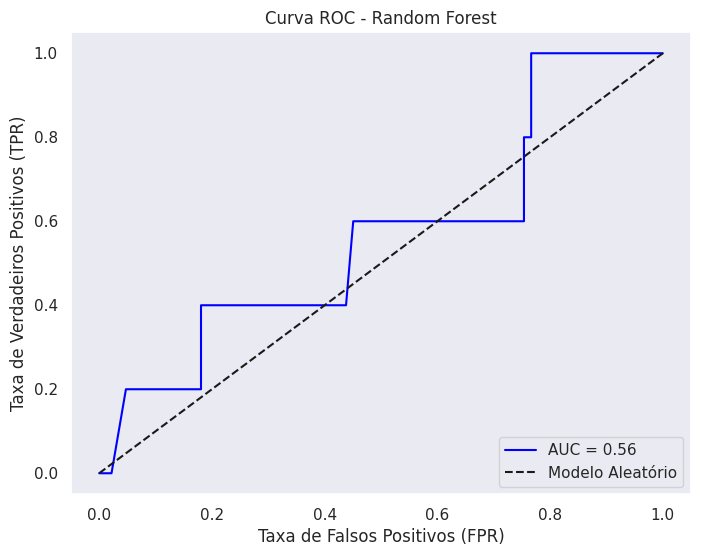

In [96]:
# Probabilidades previstas para a classe positiva (1)
y_prob = rf.predict_proba(X_teste)[:, 1] 

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_teste, y_prob)
auc = roc_auc_score(y_teste, y_prob)

# Plot da Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Modelo Aleatório')
plt.title('Curva ROC - Random Forest')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

A Curva ROC (Receiver Operating Characteristic) é uma métrica de avaliação muito utilizada para modelos de classificação binária. Ela mede a capacidade do modelo em diferenciar entre as classes positiva e negativa.


O valor de AUC = 0.56 é muito próximo de 0.5, que representa o desempenho de um modelo aleatório. Isso significa que o modelo não está aprendendo padrões significativos para diferenciar entre as classes e, na prática, está quase equivalente a realizar previsões ao acaso. Nos mostra que o modelo sofre de **underffiting**.


In [97]:
# Previsões de classe
y_pred = rf.predict(X_teste)

# Relatório de classificação
print("\nRelatório de Classificação:\n", classification_report(y_teste, y_pred))



Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.99      0.71      0.83       548
           1       0.01      0.40      0.02         5

    accuracy                           0.70       553
   macro avg       0.50      0.55      0.42       553
weighted avg       0.98      0.70      0.82       553



Classe 0 (Não reclamou) 

-> Precision: 0.99 -> Quase todas as previsões de não reclamou estão corretas.

-> Recall:    0.71 -> O modelo identificou 71% dos clientes que realmente não reclamaram, mas deixou 29% de clientes sem serem corretamente previstos.

-> F1-Score: 0.83 -> que combina precisão e recall para esta classe.


Classe 1 (Reclamou)

-> Precision: 0.01 -> Apenas 1% das previsões da classe reclamou (1) estão corretas. Isso é extremamente baixo, indicando que o modelo quase nunca identifica corretamente essa classe.

-> Recall: 0.40 -> O modelo identificou apenas 40% dos clientes que realmente reclamaram. Ou seja, a maioria dos reclamantes foi classificada como não reclamou.

-> F1-Score: 0.02 => Combina o desempenho ruim em precisão e recall, resultando em um valor extremamente baixo.


Embora o modelo pareça performar bem na classe 0 (não reclamou), ele falha significativamente em identificar a classe 1 (reclamou), que é o foco principal do problema.

Especificidade: 0.71


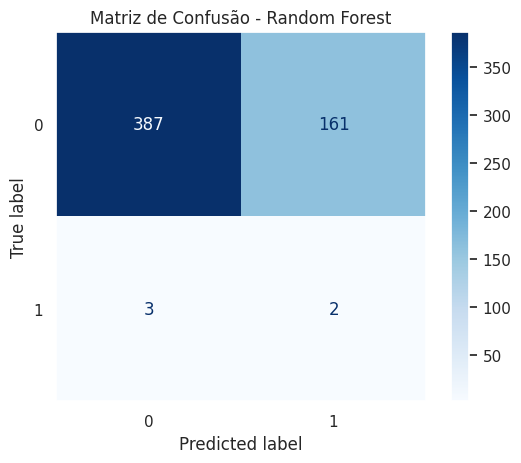

In [98]:
# Matriz de confusão
cm = confusion_matrix(y_teste, y_pred)
tn, fp, fn, tp = cm.ravel()

# Especificidade
specificity = tn / (tn + fp)
print(f"Especificidade: {specificity:.2f}")

# Exibição da Matriz de Confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusão - Random Forest')
plt.grid(False)
plt.show()

Verdadeiros Negativos (TN): 387 -> O modelo classificou corretamente 387 casos como não reclamou (classe 0).

Falsos Positivos      (FP): 161  -> 161 casos foram classificados incorretamente como reclamou (classe 1), mas na verdade pertencem à classe 0.

Falsos Negativos      (FN): 3  -> O modelo falhou ao identificar 3 clientes que saíram, classificando-os como permanecendo.

Verdadeiros Positivos (TP): 2 -> O modelo corretamente identificou 2 clientes que saíram.

A matriz de confusão é uma ferramenta essencial para identificar os erros cometidos pelo modelo e avaliar o impacto dessas falhas no negócio. No contexto de previsão de reclamações de clientes, é crucial compreender as consequências de cada tipo de erro para implementar estratégias de atendimento mais eficazes.

Erro Tipo I (Falso Positivo - FP)
Ocorre quando o modelo prediz que o cliente irá reclamar, mas, na realidade, ele não faz nenhuma reclamação, incorrendo na desnecesidade da alocação de recursos para esses clientes que de fato não estão insatisfeito. Acarreta tambem Ações de fidelização desnecessárias. Gerando desperdício de tempo e custos operacionais.

Erro Tipo II (Falso Negativo - FN)
Ocorre quando o modelo prediz que o cliente não irá reclamar, mas ele registra uma reclamação. Esse erro é mais crítico, pois a empresa falha em antecipar a insatisfação do cliente.


A especificidade (também conhecida como taxa de verdadeiros negativos) mede a proporção de instâncias negativas que foram corretamente identificadas pelo modelo.

Especificidade = Verdadeiros Negativos / (Verdadeiros Negativos + Falsos Positivos)

Com esse valor de 71% significa que modelo errou ao classificar como positivo 29% das instâncias que eram negativas (29% de Falsos Positivos). Incoreu no erro do tipo ii.
 
Embora o impacto de falsos positivos seja relevante, o recall da classe 1 (reclamações) é mais crítico neste problema. Isso porque identificar corretamente clientes que reclamarão permite agir de forma proativa, reduzindo insatisfações e potencialmente evitando impactos negativos maiores.

  ## **Conclusões**

O modelo de Random Forest desenvolvido para prever reclamações de clientes apresentou desempenho limitado em sua primeira versão. Apesar de uma acurácia geral de 73%, a análise detalhada revelou que o modelo sofre de underfitting, especialmente na identificação da classe 1 (clientes que reclamaram), com um recall de apenas 20% e uma precisão de 1% para essa classe. A Curva ROC, com AUC de 0.52, reforça que o modelo atual tem baixa capacidade de discriminação, sendo quase equivalente a um modelo aleatório.

Destaca-se que o desempenho insatisfatório está diretamente relacionado ao desequilíbrio de classes, onde a maioria dos dados pertence à classe 0 (não reclamou), e à necessidade de ajustes nos hiperparâmetros e na engenharia de atributos. Além disso, variáveis com baixa importância no modelo podem estar contribuindo para a dificuldade em capturar padrões relevantes.

**Ações Propostas para Melhorar o Modelo**:

1. **Ajuste de Hiperparâmetros**:

a) Explorar combinações de parâmetros como `max_depth`, `n_estimators` e `min_samples_split` por meio de técnicas que otimizam, exemplo **GridSearchCV** ou **RandomizedSearchCV**.

2. **Engenharia de Atributos**:

a) Revisar e criar novas variáveis que melhor representem os padrões de comportamento dos clientes.

b) Remover variáveis irrelevantes com importância zero para simplificar o modelo.

3. **Testar Novos Algoritmos**:

a) Comparar o desempenho do Random Forest com outros modelos, como LightGBM, XGBoost, ou Logistic Regression com regularização, que podem ser mais adequados para o problema.

4. **Refinar o Pré-Processamento**:

a) Realizar uma análise mais aprofundada dos outliers e possíveis inconsistências nos dados que podem estar prejudicando o aprendizado do modelo.

Este modelo representa apenas a primeira iteração dentro da metodologia CRISP-DM, que permite retornos às etapas anteriores para refinamentos. Com as ações propostas, espera-se desenvolver um modelo mais robusto e eficaz, capaz de identificar com maior precisão os clientes propensos a reclamar, proporcionando à empresa ferramentas para agir de forma proativa na melhoria da experiência do cliente.

___